# Validierung

Dieses Notebook dient der Analyse, Visualisierung und Validierung von Simulationsergebnissen aus dem Energiesystemmodell **burn4h2**.

## 1. Setup & Bibliotheken

In [2]:
# Bibliotheken importieren
import os
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Optional: Helper-Funktionen auslagern
# from utils import ...

# Plot-Design
sns.set_theme(style='whitegrid')

## 2. Szenarien & Daten einlesen

In [3]:
# Verzeichnis mit Output-Dateien
output_base = '../data/output/'  # ggf. anpassen

# Alle verfügbaren Szenarien finden
scenario_dirs = [d for d in os.listdir(output_base) if os.path.isdir(os.path.join(output_base, d))]
print('Verfügbare Szenarien:', scenario_dirs)

# Szenarien zur Analyse auswählen (z.B. per Liste oder interaktiv)
selected_scenarios = ['ue24_ST-max_NW-ext_2028']

# Alle Output-Dateien der gewählten Szenarien finden
output_files = []
for scen in selected_scenarios:
    files = glob.glob(os.path.join(output_base, scen, '*_output.csv'))
    output_files.extend(files)
print('Gefundene Output-Dateien:', output_files)

Verfügbare Szenarien: ['archive', 'dummy', 'ue24_ST-max_NW-ext_2028']
Gefundene Output-Dateien: ['../data/output/ue24_ST-max_NW-ext_2028\\ue24_ST-max_NW-ext_2028_0h2_20250414_134137_output.csv']


In [4]:
# Beispiel: Einlesen der Output- und Metadaten-Dateien
data = {}
metadata = {}
for file in output_files:
    df = pd.read_csv(file)
    data[file] = df
    # Metadaten einlesen, falls vorhanden
    meta_file = file.replace('_output.csv', '_metadata.json')
    if os.path.exists(meta_file):
        with open(meta_file, 'r', encoding='utf-8') as f:
            metadata[file] = json.load(f)
    else:
        metadata[file] = {}
print('Daten und Metadaten geladen.')

Daten und Metadaten geladen.


## 3. Zeitraum & Parameter auswählen

In [6]:
# Beispiel: Zeitraum auswählen (z.B. per Index, Datum oder Tagesnummer)
start_idx = 0
end_idx = 24*7*50  # z.B. erste Woche (bei stündlicher Auflösung)

# Beispiel: Parameter/Spalten auswählen
example_file = output_files[0]
df = data[example_file]
print('Verfügbare Spalten:', df.columns.tolist())

selected_columns = ['t', 'local_heat_demand', 'local_heat_grid.Z1_heat_feedin', 'local_heat_grid.Z2_heat_feedin', 'local_heat_grid.district_heat_feedin', 'stratified_storage.U_Z1', 'stratified_storage.U_Z2']  # anpassen

# Daten für gewählten Zeitraum und Parameter extrahieren
df_sel = df[selected_columns]

Verfügbare Spalten: ['t', 'gas_price', 'power_price', 'hydrogen_price', 'heat_demand', 'local_heat_demand', 'supply_temperature', 'return_temperature', 'solar_thermal_heat_profile', 'normalized_solar_thermal_heat_profile', 'heatpump_s1.delta_T_min', 'heatpump_s1.R', 'heatpump_s1.k', 'heatpump_s1.T_q', 'heatpump_s1.T_k', 'heatpump_s1.p1', 'heatpump_s1.p2', 'heatpump_s1.p3', 'heatpump_s1.p4', 'heatpump_s1.T1', 'heatpump_s1.T2', 'heatpump_s1.T3', 'heatpump_s1.T4', 'heatpump_s1.h1', 'heatpump_s1.h2', 'heatpump_s1.h3', 'heatpump_s1.h4', 'heatpump_s1.max_volume_flow_compressor', 'heatpump_s1.electrical_efficiency_compressor', 'heatpump_s1.n', 'heatpump_s1.z', 'heatpump_s2.delta_T_min', 'heatpump_s2.R', 'heatpump_s2.k', 'heatpump_s2.T_q', 'heatpump_s2.T_k', 'heatpump_s2.p1', 'heatpump_s2.p2', 'heatpump_s2.p3', 'heatpump_s2.p4', 'heatpump_s2.T1', 'heatpump_s2.T2', 'heatpump_s2.T3', 'heatpump_s2.T4', 'heatpump_s2.h1', 'heatpump_s2.h2', 'heatpump_s2.h3', 'heatpump_s2.h4', 'heatpump_s2.max_volume

## 4. Visualisierung

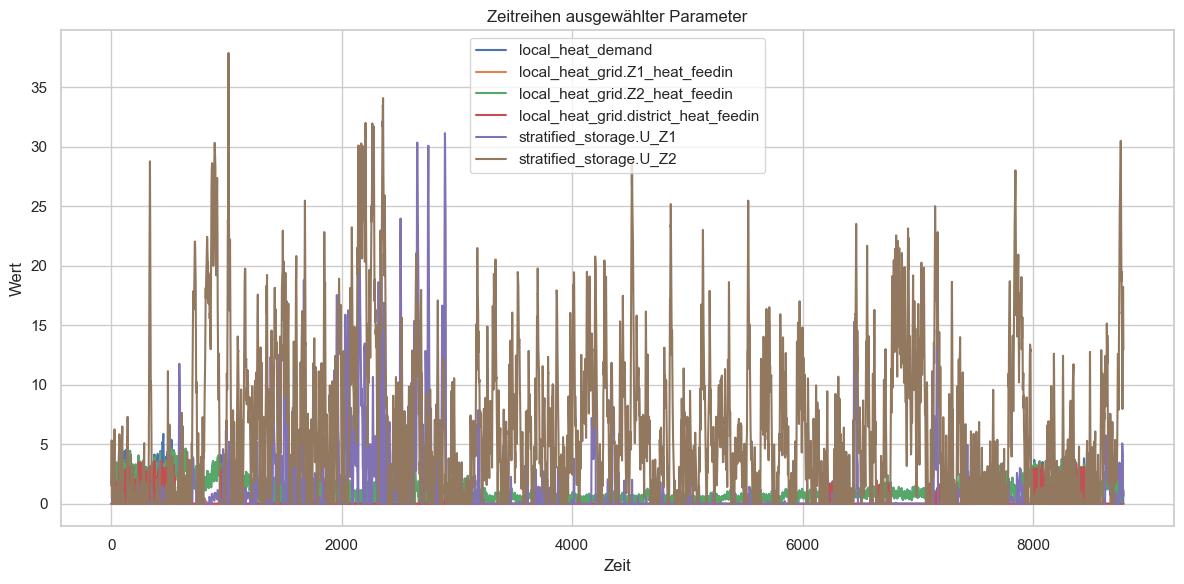

In [12]:
# Zeitreihenplot ausgewählter Parameter
plt.figure(figsize=(12,6))
for col in selected_columns[1:]:
    plt.plot(df_sel['t'], df_sel[col], label=col)
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title('Zeitreihen ausgewählter Parameter')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\wlhlm\AppData\Local\Temp\ipykernel_8012\726387592.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


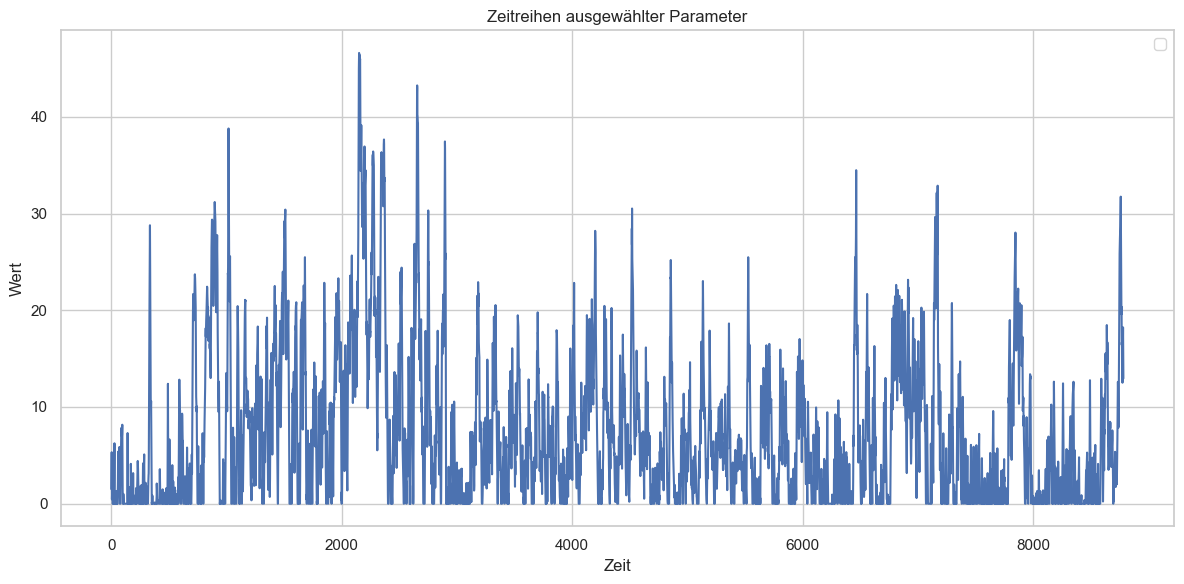

In [11]:
# Zeitreihenplot ausgewählter Parameter
plt.figure(figsize=(12,6))
plt.plot(df_sel['t'], df_sel['stratified_storage.U_Z2']+df_sel['stratified_storage.U_Z1'], )
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title('Zeitreihen ausgewählter Parameter')
plt.legend()
plt.tight_layout()
plt.show()

Gesamtanteil district_heat_feedin am local_heat_demand: 12.67%


C:\Users\wlhlm\AppData\Local\Temp\ipykernel_30988\1495445281.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



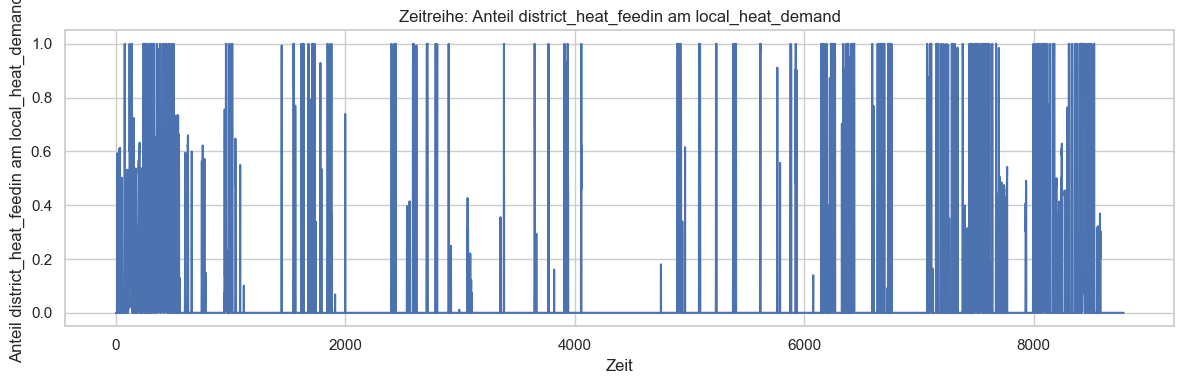

In [ ]:
# Zeitaufgelöst (für jeden Zeitschritt)
df_sel['district_heat_anteil'] = df_sel['local_heat_grid.district_heat_feedin'] / df_sel['local_heat_demand']

gesamt_anteil = df_sel['local_heat_grid.district_heat_feedin'].sum() / df_sel['local_heat_demand'].sum()
print(f"Gesamtanteil district_heat_feedin am local_heat_demand: {gesamt_anteil:.2%}")


# Optional: Zeitreihe des Anteils plotten
plt.figure(figsize=(12,4))
plt.plot(df_sel['t'], df_sel['district_heat_anteil'])
plt.xlabel('Zeit')
plt.ylabel('Anteil district_heat_feedin am local_heat_demand')
plt.title('Zeitreihe: Anteil district_heat_feedin am local_heat_demand')
plt.tight_layout()


### Weitere Diagrammtypen (z.B. Scatter, Balken, Histogramm)

## 5. Berechnungen & Kennzahlen

In [ ]:
# Beispiel: KPI-Tabelle
kpis = {
    'Summe Erzeugung': erzeugung.sum(),
    'Summe Bedarf': bedarf.sum(),
    'Max. Speicherstand': df['battery_storage.soc'].max(),
    'Min. Speicherstand': df['battery_storage.soc'].min(),
    # Weitere KPIs nach Bedarf
}
kpi_df = pd.DataFrame([kpis])
display(kpi_df)

## 6. Szenarienvergleich (optional)

## 7. Fazit & Ausblick

Hier können die wichtigsten Erkenntnisse, Auffälligkeiten und ggf. offene Fragen dokumentiert werden.

---

*Hinweis: Für wiederkehrende Auswertungen empfiehlt sich die Auslagerung von Hilfsfunktionen in eine separate Datei (`utils.py`).*